<h1>Exploring the taste of Chicago Neighborhoods

<h2>IBM Applied Data Science Capstone Project

<h3> 1. Introduction

Chicago is the most popular city in the United States, home to the headquarters of the United Nations and an important center for international diplomacy. It just might be the most diverse city on the planet, as it is home to over 8.6 million people and over 800 languages. As quoted in an article - What Food Tells Us About Culture “Traditional cuisine is passed down from one generation to the next. It also operates as an expression of cultural identity. Immigrants bring the food of their countries with them wherever they go and cooking traditional food is a way of preserving their culture when they move to new places.”

Undoubtedly, Food Diversity is an important part of an ethnically diverse metropolis. The idea of this project is to categorically segment the neighborhoods of Chicago into major clusters and examine their cuisines. A desirable intention is to examine the neighborhood cluster's food habits and taste. Further examination might reveal if food has any relationship with the diversity of a neighborhood. This project will help to understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering’ unsupervised machine learning algorithm. Exploratory Data Analysis (EDA) will help to discover further about the culture and diversity of the neighborhood.

This quantifiable analysis can be used to understand the distribution of different cultures and cuisines over ‘the most diverse city on the planet – Chicago’. Also, it can be utilized by a new food vendor who is willing to open his or her restaurant. Or by a government authority to examine and study their city's culture diversity better.

<h3>2. Data

To examine the above said, following data sources will be used:

<h5> Chicago Dataset

Link: https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago

There are sometimes said to be more than 200 neighborhoods in Chicago, though few residents would agree on their names and boundaries. A city ordinance prescribing and mapping 178 neighborhoods is almost unknown and ignored even by municipal departments. Neighborhood names and identities have evolved over time due to real estate development and changing demographics. The City of Chicago is also divided into 77 community areas which were drawn by University of Chicago researchers in the late 1920s. Chicago's community areas are well-defined, generally contain multiple neighborhoods, and are less commonly used by city residents. More historical images of Chicago neighborhoods can be found in Explore Chicago Collections, a digital repository made available by Chicago Collections archives, libraries and other cultural institutions in the city. 

<h5> Foursquare API

Link: https://developer.foursquare.com/docs

Foursquare API, a location data provider, will be used to make RESTful API calls to retrieve data about venues in different neighborhoods. This is the link to Foursquare Venue Category Hierarchy. Venues retrieved from all the neighborhoods are categorized broadly into ‘Arts & Entertainment’, ‘College &University’, ‘Event’, ‘Food’, ‘Nightlife Spot’, ‘Outdoors & Recreation’, etc.


<h3>3. Methodology

Download all the dependencies.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium
import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage

<h5>Download and Explore Chicago city Dataset

In [2]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
data = pd.read_html(str(table))
df=pd.DataFrame(data[0])

# More than one community area can exist in one neighbourhood. 


df1=df.groupby("Community area").agg(lambda x:','.join(set(x)))

df1.head()


,Neighborhood
Community area,
Albany Park,"Albany Park,Ravenswood Manor,Mayfair,North May..."
Archer Heights,Archer Heights
Armour Square,"Armour Square,Wentworth Gardens,Chinatown"
Ashburn,"Ashburn Estates,Parkview,Ashburn,Crestline,Bev..."
Auburn Gresham,"Auburn Gresham,Gresham"


In [3]:
df1.reset_index(inplace=True)
df1.rename(columns={"Community area" : "Borough"}, inplace = True)
df1.head()

,Borough,Neighborhood
0,Albany Park,"Albany Park,Ravenswood Manor,Mayfair,North May..."
1,Archer Heights,Archer Heights
2,Armour Square,"Armour Square,Wentworth Gardens,Chinatown"
3,Ashburn,"Ashburn Estates,Parkview,Ashburn,Crestline,Bev..."
4,Auburn Gresham,"Auburn Gresham,Gresham"


<h5>Adding longitude and latitudes

In [4]:
geo_data=pd.read_csv("https://raw.githubusercontent.com/hereticknave/Coursera_Capstone/master/chicago_data_geocodio_0f7af7ebeedaa3a76d66fbb68866b00674e9fa76.csv")
geo_data
df1['Latitude']=geo_data['Latitude'].values
df1['Longitude']=geo_data['Longitude'].values

df1




,Borough,Neighborhood,Latitude,Longitude
0,Albany Park,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098
1,Archer Heights,Archer Heights,41.696598,-87.936453
2,Armour Square,"Armour Square,Wentworth Gardens,Chinatown",41.892001,-87.665688
3,Ashburn,"Ashburn Estates,Parkview,Ashburn,Crestline,Bev...",41.885310,-87.622130
4,Auburn Gresham,"Auburn Gresham,Gresham",42.078163,-88.031678
5,Austin,"South Austin,North Austin,The Island,Galewood",41.568075,-87.769531
6,"Austin, Humboldt Park",West Humboldt Park,41.568075,-87.769531
7,Avalon Park,"Marynook,Avalon Park,Stony Island Park",41.885310,-87.622130
8,Avondale,"Jackowo,Wacławowo,Avondale",41.977474,-87.776185
9,"Avondale, Irving Park",Polish Village,41.977474,-87.776185


<h5> Use geopy library to get the latitude and longitude values of Chicago City.

In [5]:

address = 'Chicago, IL'
location = None

# define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


<h5>Create a map of Chicago with neighborhoods superimposed on top

In [6]:
neighborhoods=df1

# create map of Chicago using latitude and longitude values
map_chi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chi)  
    
map_chi

<h5>Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'W0MYEY4TLJORREX51BMBESNWIOXHRLVHHETZB04FC1WJWTG3' # your Foursquare ID
CLIENT_SECRET = '5KP55NVF1VC5XXERJ3RI0DDB23TSU2G04EVWVVY4GM5IW5ZL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: W0MYEY4TLJORREX51BMBESNWIOXHRLVHHETZB04FC1WJWTG3
CLIENT_SECRET:5KP55NVF1VC5XXERJ3RI0DDB23TSU2G04EVWVVY4GM5IW5ZL


<h5>
Fetch Foursquare Venue Category Hierarchy

In [8]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

Let's see the structure or the keys of the returned request.

In [9]:

for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [10]:
category_list = category_results['response']['categories']

In [11]:

len(category_list)

10

In [12]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


<h5>Food & It's Sub-Categories

Let's create a function to return a dictionary with Ids' & Names of Food & It's Sub-Categories.

In [13]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [14]:

# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')
category_dict

{'4d4b7105d754a06374d81259': 'Food',
 '503288ae91d4c4b30a586d67': 'Afghan Restaurant',
 '4bf58dd8d48988d1c8941735': 'African Restaurant',
 '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant',
 '4bf58dd8d48988d14e941735': 'American Restaurant',
 '4bf58dd8d48988d157941735': 'New American Restaurant',
 '4bf58dd8d48988d142941735': 'Asian Restaurant',
 '56aa371be4b08b9a8d573568': 'Burmese Restaurant',
 '52e81612bcbc57f1066b7a03': 'Cambodian Restaurant',
 '4bf58dd8d48988d145941735': 'Chinese Restaurant',
 '52af3a5e3cf9994f4e043bea': 'Anhui Restaurant',
 '52af3a723cf9994f4e043bec': 'Beijing Restaurant',
 '52af3a7c3cf9994f4e043bed': 'Cantonese Restaurant',
 '58daa1558bbb0b01f18ec1d3': 'Cha Chaan Teng',
 '52af3a673cf9994f4e043beb': 'Chinese Aristocrat Restaurant',
 '52af3a903cf9994f4e043bee': 'Chinese Breakfast Place',
 '4bf58dd8d48988d1f5931735': 'Dim Sum Restaurant',
 '52af3a9f3cf9994f4e043bef': 'Dongbei Restaurant',
 '52af3aaa3cf9994f4e043bf0': 'Fujian Restaurant',
 '52af3ab53cf9994f4e043bf1'

Now, we have all the categories in Food with their id's.

<h5>Explore the first borough to understand the results of GET Request

Get the neighborhood's name.

In [15]:
neighborhoods.loc[0, 'Neighborhood']

'Albany Park,Ravenswood Manor,Mayfair,North Mayfair'

Get the neighborhood's latitude and longitude values.

In [16]:

neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Albany Park,Ravenswood Manor,Mayfair,North Mayfair are 41.717189000000005, -87.69909799999999.


<h5>Now, let's get the Food that is in Wakefield within a radius of 500 meters.


First, let's create the GET request URL to search for Venue with requested Category ID

In [17]:
LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=W0MYEY4TLJORREX51BMBESNWIOXHRLVHHETZB04FC1WJWTG3&client_secret=5KP55NVF1VC5XXERJ3RI0DDB23TSU2G04EVWVVY4GM5IW5ZL&v=20180605&ll=41.717189000000005,-87.69909799999999&radius=500&categoryId=4d4b7105d754a06374d81259&limit=1'


Send the GET request and examine the resutls

In [18]:

results = requests.get(url).json()

In [19]:
results['response']['venues']

[{'id': '42c1e480f964a520c2251fe3',
  'name': 'Chi Tung Restaurant',
  'location': {'address': '9560 S Kedzie Ave',
   'crossStreet': 'at 95th St',
   'lat': 41.7193530332884,
   'lng': -87.7019967639367,
   'labeledLatLngs': [{'label': 'display',
     'lat': 41.7193530332884,
     'lng': -87.7019967639367}],
   'distance': 340,
   'postalCode': '60805',
   'cc': 'US',
   'city': 'Evergreen Park',
   'state': 'IL',
   'country': 'United States',
   'formattedAddress': ['9560 S Kedzie Ave (at 95th St)',
    'Evergreen Park, IL 60805',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d145941735',
    'name': 'Chinese Restaurant',
    'pluralName': 'Chinese Restaurants',
    'shortName': 'Chinese',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
     'suffix': '.png'},
    'primary': True}],
  'delivery': {'id': '629506',
   'url': 'https://www.grubhub.com/restaurant/chi-tung-9560-s-kedzie-ave-evergreen-park/629506?affiliate=1131&utm_source=foursq

The category name of the venue 'Chi Tung Restaurant' is 'Food'.



As, our aim is to segment the neighborhoods of Chicago with respect to the Food in its vicinity. We need to proceed further to fetch this data from all the neighborhoods' venues.

<h5>Let's create a function to repeat the following process to all the neighborhoods in Chicago:



Let's create a function to repeat the following process to all the neighborhoods in NYC:
Loop through neighborhoods
Create the API request URL with radius=500, LIMIT=100
Make the GET request
For each neighborhood, return only relevant information for each nearby venue
Append all nearby venues to a list
Unfold the list & append it to dataframe being returned
The categoryId parameter in the API request URL can be a comma seperated string. So, lets create a comma seperated string from category_dict.

In [20]:

categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

The above process turns out to be redundant because if a top-level category is specified in the GET Request, all sub-categories will also match the query. But it is an interesting way to retrieve all the sub-categories ID with name.

In [21]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

Let's use pickle library to serialize the information retrieved from GET requests. This step will counter any redundant requests to the Foursquare API.

In [22]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        chi_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    chi_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('chi_food_venues.pkl', 'wb') as f:
        pickle.dump(chi_venues, f)
    print("---Dataframe Created and Serialized---")

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 0 venues with incompelete information.
---Dataframe Created and Serialized---


<h3> 4. Analysis & Machine Learning

<h5>Let's check the size of the resulting dataframe

In [23]:
print(chi_venues.shape)
chi_venues.head()

(3556, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Chi Tung Restaurant,41.719353,-87.701997,Chinese Restaurant
1,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Popeyes Louisiana Kitchen,41.720605,-87.690686,Fried Chicken Joint
2,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Culver's,41.719846,-87.701508,Fast Food Restaurant
3,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Wingstop,41.720428,-87.693884,Wings Joint
4,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Pizza Hut,41.720427,-87.693984,Pizza Place


<h5>Let's find out how many unique categories can be curated from all the returned venues


In [24]:
print('There are {} uniques categories.'.format(len(chi_venues['Venue Category'].unique())))
chi_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 109 uniques categories.


Venue Category
Coffee Shop                        528
Food Court                         196
Pizza Place                        181
Italian Restaurant                 166
American Restaurant                164
New American Restaurant            151
Fast Food Restaurant               138
Café                               133
Mexican Restaurant                 133
Seafood Restaurant                 108
Mediterranean Restaurant           100
Pub                                 97
Bakery                              93
Donut Shop                          81
Breakfast Spot                      76
BBQ Joint                           70
Burger Joint                        66
Hot Dog Joint                       64
Sushi Restaurant                    56
Asian Restaurant                    55
Gastropub                           53
Sandwich Place                      51
Noodle House                        49
Shopping Mall                       48
Sports Bar                          48
Hotel     

As we are interested in exploring the diversity of the neighborhood. Let's remove the generalized categories, like Coffee Shop, Cafe, etc.

In [25]:
# list all the categories
unique_categories = chi_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Chinese Restaurant, Fried Chicken Joint, Fast Food Restaurant, Wings Joint, Pizza Place, Ice Cream Shop, Latin American Restaurant, Thai Restaurant, Japanese Restaurant, Mexican Restaurant, Bakery, Sandwich Place, Sushi Restaurant, Donut Shop, Breakfast Spot, Taco Place, Deli / Bodega, Cafeteria, Indian Restaurant, Italian Restaurant, American Restaurant, BBQ Joint, Coffee Shop, Bagel Shop, Food, Event Space, Café, Portuguese Restaurant, Greek Restaurant, Pie Shop, Concert Hall, Gastropub, Restaurant, Bar, Burger Joint, Filipino Restaurant, German Restaurant, Brewery, Music Venue, Whisky Bar, Modern European Restaurant, New American Restaurant, Hotel, Food Court, Salad Place, Shopping Mall, Hot Dog Joint, Noodle House, Mediterranean Restaurant, Gourmet Shop, Sports Bar, Seafood Restaurant, Pub, Asian Restaurant, Tiki Bar, Food Truck, Convenience Store, Eastern European Restaurant, Vietnamese Restaurant, Spanish Restaurant, Diner, Southern / Soul Food Restaurant, African Restaurant, Bra

In [26]:

# manually create a list of generalized categories
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Deli / Bodega','Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'Irish Pub','College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market','Mac & Cheese Joint','Creperie',
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [27]:

# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Italian Restaurant, Dumpling Restaurant, Fried Chicken Joint, Middle Eastern Restaurant, African Restaurant, Southern / Soul Food Restaurant, Mediterranean Restaurant, Vegetarian / Vegan Restaurant, Chinese Restaurant, Japanese Restaurant, Portuguese Restaurant, Whisky Bar, Brazilian Restaurant, Fondue Restaurant, Cajun / Creole Restaurant, Indian Restaurant, Falafel Restaurant, Caribbean Restaurant, Colombian Restaurant, Tapas Restaurant, Steakhouse, Liquor Store, Burrito Place, Thai Restaurant, Czech Restaurant, Korean Restaurant, Dim Sum Restaurant, Polish Restaurant, Seafood Restaurant, Ukrainian Restaurant, BBQ Joint, Szechuan Restaurant, Ramen Restaurant, Latin American Restaurant, Eastern European Restaurant, Greek Restaurant, Halal Restaurant, New American Restaurant, Tiki Bar, Israeli Restaurant, French Restaurant, Shopping Mall, Performing Arts Venue, Moroccan Restaurant, Professional & Other Places, Asian Restaurant, Vietnamese Restaurant, Hawaiian Restaurant, Peruvian Resta


Let's remove all the generalized categories, like Coffee Shop, Cafe, etc.

In [28]:

chi_venues = chi_venues[chi_venues['Venue Category'].isin(food_categories)].reset_index()
chi_venues.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Chi Tung Restaurant,41.719353,-87.701997,Chinese Restaurant
1,1,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Popeyes Louisiana Kitchen,41.720605,-87.690686,Fried Chicken Joint
2,2,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Culver's,41.719846,-87.701508,Fast Food Restaurant
3,4,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Pizza Hut,41.720427,-87.693984,Pizza Place
4,6,"Albany Park,Ravenswood Manor,Mayfair,North May...",41.717189,-87.699098,Unidad,41.720398,-87.706084,Latin American Restaurant


In [29]:
print('There are {} unique FOOD categories.'.format(len(chi_venues['Venue Category'].unique())))

There are 68 unique FOOD categories.


<h4>Analyze Each Neighborhood

In [30]:
# one hot encoding
chi_onehot = pd.get_dummies(chi_venues[['Venue Category']], prefix="", prefix_sep="")
chi_onehot.head()

,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Brazilian Restaurant,Brewery,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Concert Hall,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Movie Theater,New American Restaurant,Noodle House,Performing Arts Venue,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Professional & Other Places,Ramen Restaurant,Seafood Restaurant,Shopping Mall,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Tiki Bar,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:

# add neighborhood column back to dataframe
chi_onehot['Neighborhood'] = chi_venues['Neighborhood'] 
chi_onehot.head()

,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Brazilian Restaurant,Brewery,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Concert Hall,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Movie Theater,New American Restaurant,Noodle House,Performing Arts Venue,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Professional & Other Places,Ramen Restaurant,Seafood Restaurant,Shopping Mall,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Tiki Bar,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Albany Park,Ravenswood Manor,Mayfair,North May..."
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Albany Park,Ravenswood Manor,Mayfair,North May..."
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Albany Park,Ravenswood Manor,Mayfair,North May..."
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Albany Park,Ravenswood Manor,Mayfair,North May..."
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Albany Park,Ravenswood Manor,Mayfair,North May..."


In [32]:

# move neighborhood column to the first column
Neighborhood = chi_onehot['Neighborhood']

chi_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
chi_onehot.insert(0, 'Neighborhood', Neighborhood)

chi_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Brazilian Restaurant,Brewery,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Concert Hall,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Movie Theater,New American Restaurant,Noodle House,Performing Arts Venue,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Professional & Other Places,Ramen Restaurant,Seafood Restaurant,Shopping Mall,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Tiki Bar,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar
0,"Albany Park,Ravenswood Manor,Mayfair,North May...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Albany Park,Ravenswood Manor,Mayfair,North May...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Albany Park,Ravenswood Manor,Mayfair,North May...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Albany Park,Ravenswood Manor,Mayfair,North May...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Albany Park,Ravenswood Manor,Mayfair,North May...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.



In [33]:
chi_onehot.shape

(1707, 69)

In [34]:

venue_counts = chi_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Brazilian Restaurant,Brewery,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Concert Hall,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Movie Theater,New American Restaurant,Noodle House,Performing Arts Venue,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Professional & Other Places,Ramen Restaurant,Seafood Restaurant,Shopping Mall,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Tiki Bar,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Albany Park,Ravenswood Manor,Mayfair,North Mayfair",0,1,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,5,0,0,0,2,0,0,0,0,1,0,1,1,0,0,1,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,0,0,0
"Armour Square,Wentworth Gardens,Chinatown",0,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,1,0,0,1,1,1,0,0,0,0,2,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,1
"Ashburn Estates,Parkview,Ashburn,Crestline,Beverly View,Scottsdale,Wrightwood",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,1,0,0,0,0,3,1,0,0,2,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
"Auburn Gresham,Gresham",0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Belmont Central,Cragin,Hanson Park,Brickyard",0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,1,0,0,0,0,3,1,0,0,2,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


Let's find out the top 10 food categories in Chicago

In [35]:
venue_counts_described = venue_counts.describe().transpose()

In [36]:

venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Mexican Restaurant,81.0,1.641975,2.087514,0.0,1.0,1.0,1.0,13.0
Fast Food Restaurant,81.0,1.703704,1.791957,0.0,1.0,1.0,2.0,10.0
Fried Chicken Joint,81.0,0.530864,1.423784,0.0,0.0,0.0,0.0,8.0
Pizza Place,81.0,2.234568,1.075542,0.0,2.0,2.0,2.0,7.0
Chinese Restaurant,81.0,0.580247,0.985700,0.0,0.0,0.0,1.0,5.0
American Restaurant,81.0,2.024691,0.987108,0.0,2.0,2.0,2.0,5.0
Italian Restaurant,81.0,2.049383,1.312452,0.0,1.0,3.0,3.0,4.0
Seafood Restaurant,81.0,1.333333,0.961769,0.0,0.0,2.0,2.0,4.0
Greek Restaurant,81.0,0.148148,0.550252,0.0,0.0,0.0,0.0,3.0
Southern / Soul Food Restaurant,81.0,0.197531,0.579218,0.0,0.0,0.0,0.0,3.0


In [37]:
venue_top10_list = venue_top10.index.values.tolist()

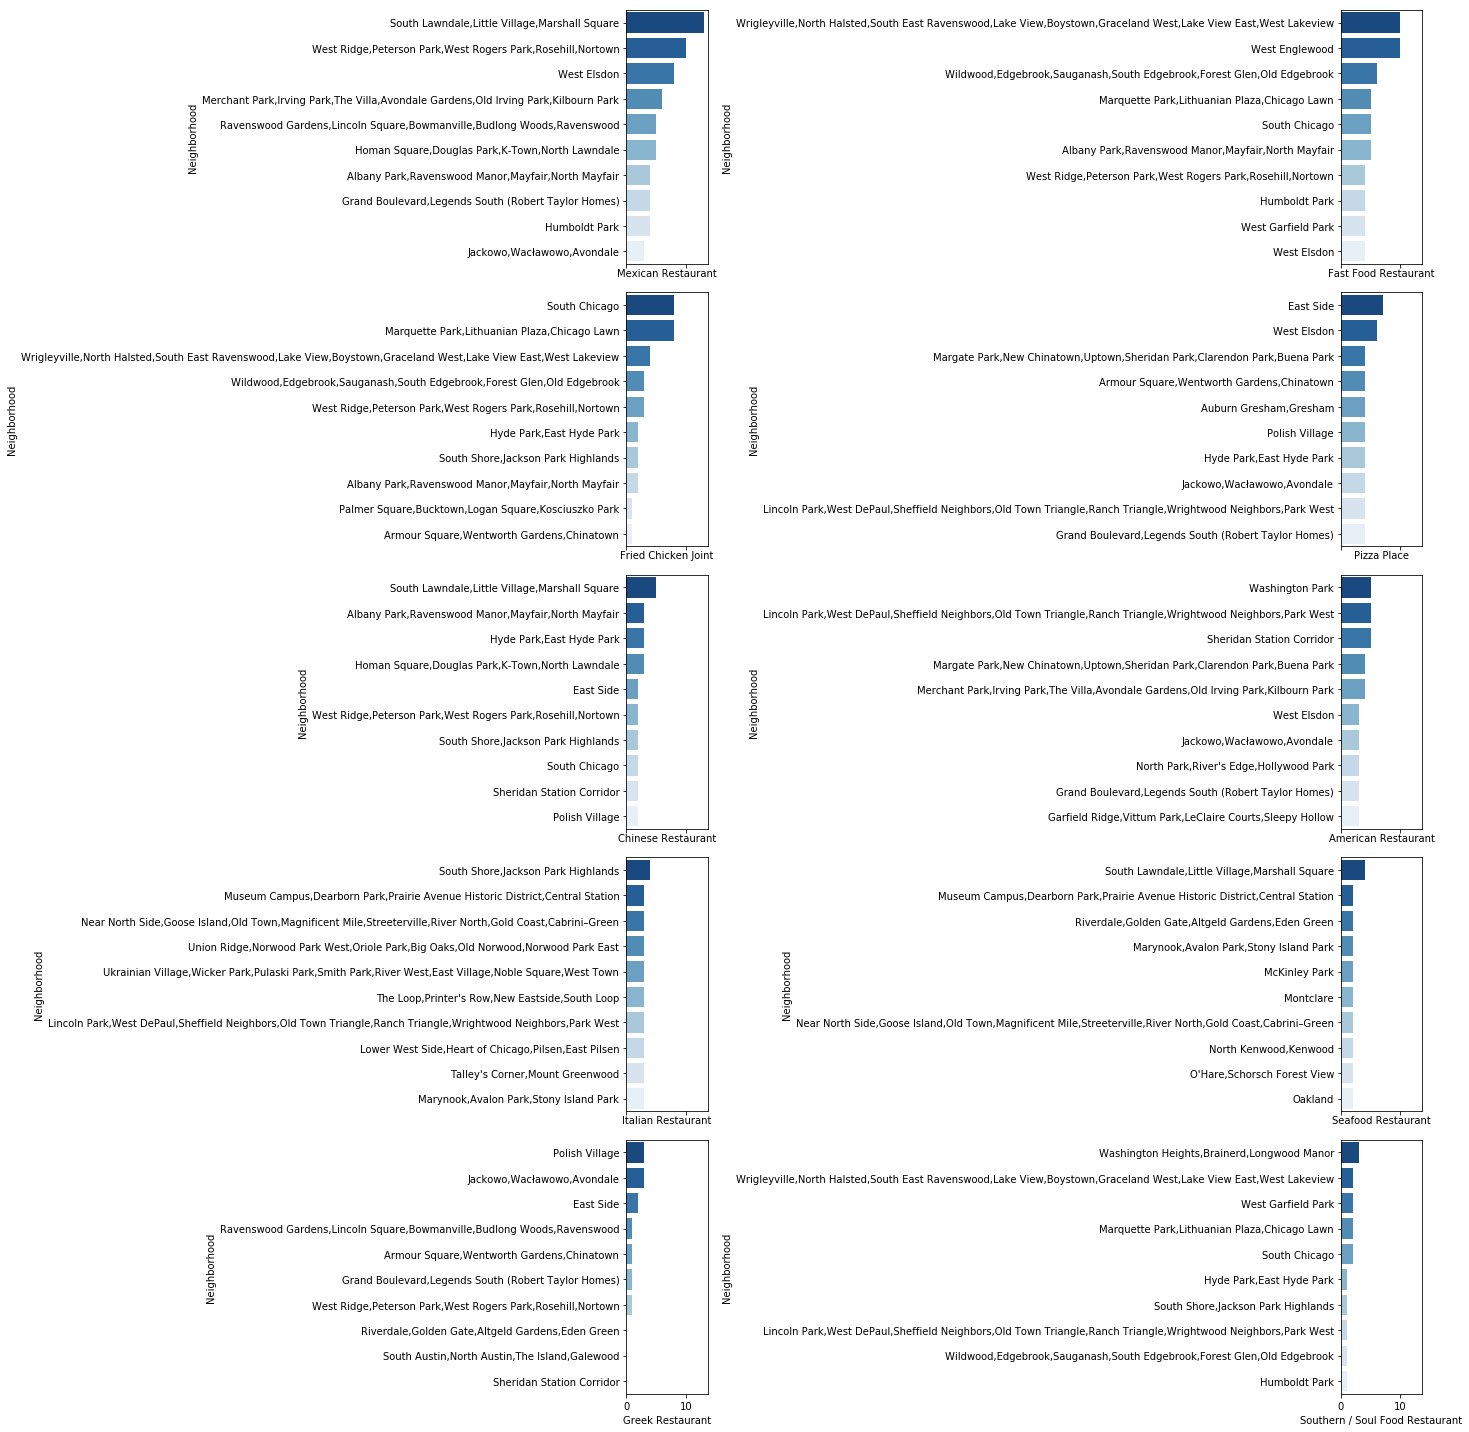

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()
object_bol = df.dtypes == 'object'

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show()

<h5>Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [40]:
chi_grouped = chi_onehot.groupby('Neighborhood').mean().reset_index()
chi_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Brazilian Restaurant,Brewery,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Concert Hall,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fondue Restaurant,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Liquor Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Movie Theater,New American Restaurant,Noodle House,Performing Arts Venue,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Professional & Other Places,Ramen Restaurant,Seafood Restaurant,Shopping Mall,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Tiki Bar,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar
0,"Albany Park,Ravenswood Manor,Mayfair,North May...",0.0,0.035714,0.000000,0.107143,0.0,0.000000,0.0,0.0,0.0,0.0,0.107143,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.178571,0.000000,0.0,0.0,0.071429,0.000000,0.000000,0.0,0.0,0.035714,0.0,0.035714,0.035714,0.0,0.0,0.035714,0.0,0.000000,0.142857,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.071429,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.035714,0.0,0.071429,0.0,0.035714,0.000000,0.0,0.0,0.0,0.000000
1,"Armour Square,Wentworth Gardens,Chinatown",0.0,0.076923,0.000000,0.000000,0.0,0.038462,0.0,0.0,0.0,0.0,0.038462,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.038462,0.0,0.0,0.038462,0.038462,0.038462,0.0,0.0,0.000000,0.0,0.076923,0.038462,0.0,0.0,0.000000,0.0,0.000000,0.038462,0.0,0.038462,0.0,0.0,0.038462,0.000000,0.0,0.0,0.153846,0.0,0.038462,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.038462,0.0,0.000000,0.0,0.076923,0.000000,0.0,0.0,0.0,0.038462
2,"Ashburn Estates,Parkview,Ashburn,Crestline,Bev...",0.0,0.090909,0.045455,0.045455,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.136364,0.000000,0.0,0.0,0.000000,0.0,0.090909,0.045455,0.0,0.000000,0.0,0.0,0.136364,0.045455,0.0,0.0,0.090909,0.0,0.000000,0.0,0.0,0.090909,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.000000,0.0,0.000000,0.045455,0.0,0.0,0.0,0.000000
3,"Auburn Gresham,Gresham",0.0,0.250000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.083333,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.083333,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,"Belmont Central,Cragin,Hanson Park,Brickyard",0.0,0.090909,0.045455,0.045455,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.136364,0.000000,0.0,0.0,0.000000,0.0,0.090909,0.045455,0.0,0.000000,0.0,0.0,0.136364,0.045455,0.0,0.0,0.090909,0.0,0.000000,0.0,0.0,0.090909,0.045455,0.0,0.0,0.0,0.0,0.045455,0.0,0.000000,0.0,0.000000,0.045455,0.0,0.0,0.0,0.000000


Let's confirm the new size

In [41]:

chi_grouped.shape

(81, 69)

Let's write a function to sort the venues in descending order

In [42]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [43]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [44]:

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chi_grouped['Neighborhood']

In [45]:

for ind in np.arange(chi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Albany Park,Ravenswood Manor,Mayfair,North May...",Fast Food Restaurant,Mexican Restaurant,BBQ Joint,Chinese Restaurant,Taco Place
1,"Armour Square,Wentworth Gardens,Chinatown",Pizza Place,American Restaurant,Italian Restaurant,Thai Restaurant,Fast Food Restaurant
2,"Ashburn Estates,Parkview,Ashburn,Crestline,Bev...",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant
3,"Auburn Gresham,Gresham",Pizza Place,American Restaurant,Fast Food Restaurant,Fried Chicken Joint,Mediterranean Restaurant
4,"Belmont Central,Cragin,Hanson Park,Brickyard",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant


<h4>Cluster Neighborhoods

Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [46]:
chi_grouped_clustering = chi_grouped.drop('Neighborhood', 1)

Determine the optimal number of clusters for k-means clustering

The Elbow Method - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [47]:

sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(chi_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (33). Possibly due to duplicate points in X.
  return_n_iter=True)


33 34 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (34). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (35). Possibly due to duplicate points in X.
  return_n_iter=True)


35 36 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (36). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (37). Possibly due to duplicate points in X.
  return_n_iter=True)


37 38 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (38). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  return_n_iter=True)


39 40 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (41). Possibly due to duplicate points in X.
  return_n_iter=True)


41 42 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (42). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (43). Possibly due to duplicate points in X.
  return_n_iter=True)


43 44 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (44). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (45). Possibly due to duplicate points in X.
  return_n_iter=True)


45 46 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (46). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (47). Possibly due to duplicate points in X.
  return_n_iter=True)


47 48 49 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (48). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (49). Possibly due to duplicate points in X.
  return_n_iter=True)


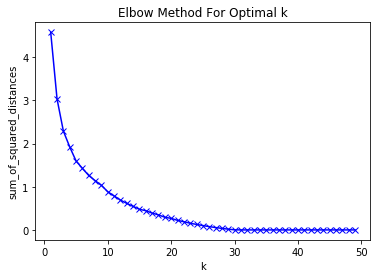

In [48]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');


Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.


The Silhouette Method - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Source: Wikipedia

In [49]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(chi_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(chi_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (32). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (33). Possibly due to duplicate points in X.
  return_n_iter=True)


33 34 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (34). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (35). Possibly due to duplicate points in X.
  return_n_iter=True)


35 36 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (36). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (37). Possibly due to duplicate points in X.
  return_n_iter=True)


37 38 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (38). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  return_n_iter=True)


39 40 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (41). Possibly due to duplicate points in X.
  return_n_iter=True)


41 42 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (42). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (43). Possibly due to duplicate points in X.
  return_n_iter=True)


43 44 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (44). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (45). Possibly due to duplicate points in X.
  return_n_iter=True)


45 46 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (46). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (47). Possibly due to duplicate points in X.
  return_n_iter=True)


47 48 49 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (48). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (31) found smaller than n_clusters (49). Possibly due to duplicate points in X.
  return_n_iter=True)


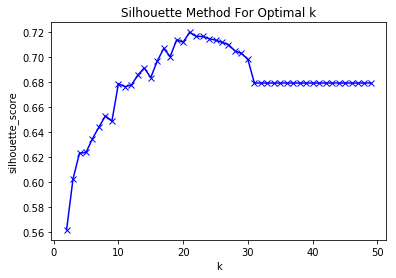

In [50]:

plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 6 and k = 8. Four clusters will give a very broad classification of the venues.

<h5>Let's set number of clusters = 8

In [51]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(chi_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({0: 47, 4: 12, 1: 6, 3: 5, 2: 3, 5: 3, 7: 3, 6: 2})


Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.



In [52]:

# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [53]:
neighborhoods_venues_sorted.head(5)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4,"Albany Park,Ravenswood Manor,Mayfair,North May...",Fast Food Restaurant,Mexican Restaurant,BBQ Joint,Chinese Restaurant,Taco Place
1,4,"Armour Square,Wentworth Gardens,Chinatown",Pizza Place,American Restaurant,Italian Restaurant,Thai Restaurant,Fast Food Restaurant
2,0,"Ashburn Estates,Parkview,Ashburn,Crestline,Bev...",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant
3,2,"Auburn Gresham,Gresham",Pizza Place,American Restaurant,Fast Food Restaurant,Fried Chicken Joint,Mediterranean Restaurant
4,0,"Belmont Central,Cragin,Hanson Park,Brickyard",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant


In [54]:

# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
chi_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
chi_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
0,4,"Albany Park,Ravenswood Manor,Mayfair,North May...",Fast Food Restaurant,Mexican Restaurant,BBQ Joint,Chinese Restaurant,Taco Place,Albany Park,41.717189,-87.699098
1,4,"Armour Square,Wentworth Gardens,Chinatown",Pizza Place,American Restaurant,Italian Restaurant,Thai Restaurant,Fast Food Restaurant,Armour Square,41.892001,-87.665688
2,0,"Ashburn Estates,Parkview,Ashburn,Crestline,Bev...",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant,Ashburn,41.885310,-87.622130
3,2,"Auburn Gresham,Gresham",Pizza Place,American Restaurant,Fast Food Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Auburn Gresham,42.078163,-88.031678
4,0,"Belmont Central,Cragin,Hanson Park,Brickyard",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant,Belmont Cragin,41.885310,-87.622130


Finally, let's visualize the resulting clusters

In [55]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chi_merged['Latitude'], chi_merged['Longitude'], chi_merged['Neighborhood'], chi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


<h3> 5. Results

In [56]:
required_column_indices = [2,3,7]
required_column = [list(chi_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

<h5> Cluster 0

In [57]:

cluster_0 = chi_merged.loc[chi_merged['Cluster Labels'] == 0, chi_merged.columns[1:12]]
cluster_0.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
2,"Ashburn Estates,Parkview,Ashburn,Crestline,Bev...",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant,Ashburn,41.88531,-87.62213
4,"Belmont Central,Cragin,Hanson Park,Brickyard",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant,Belmont Cragin,41.88531,-87.62213
5,"Beverly Woods,Kennedy Park,West Morgan Park,Mo...",New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant,Morgan Park,41.88531,-87.62213
6,Bridgeport,New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant,Bridgeport,41.88531,-87.62213
7,Brighton Park,New American Restaurant,Italian Restaurant,Mediterranean Restaurant,American Restaurant,Seafood Restaurant,Brighton Park,41.88531,-87.62213


In [58]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

New American Restaurant    47
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant    47
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
McKinley Park              1
Belmont Cragin             1
West Lawn                  1
Pullman                    1
North Center               1
West Town, Logan Square    1
Brighton Park              1
Montclare                  1
Greater Grand Crossing     1
Kenwood                    1
Gage Park                  1
Chatham, Roseland          1
Dunning                    1
Oakland                    1
Ashburn                    1
Fuller Park                1
West Town                  1
West Pullman               1
Roseland                   1
Englewood                  1
Norwood Park               1
Avalon Park                1
Portage Park               1
Chatham                    1
Beverly                    1
Riverdale                  1
Clearing       

<h5> Cluster 1

In [59]:
cluster_1 = chi_merged.loc[chi_merged['Cluster Labels'] == 1, chi_merged.columns[1:12]]
cluster_1.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
30,"Hyde Park,East Hyde Park",Pizza Place,Fast Food Restaurant,Chinese Restaurant,Mexican Restaurant,Fried Chicken Joint,Hyde Park,41.881518,-87.885680
38,"Merchant Park,Irving Park,The Villa,Avondale G...",Mexican Restaurant,American Restaurant,Pizza Place,Asian Restaurant,Thai Restaurant,Irving Park,41.953613,-87.731348
52,"Ravenswood Gardens,Lincoln Square,Bowmanville,...",Mexican Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Chinese Restaurant,Lincoln Square,42.003933,-87.994238
71,West Elsdon,Mexican Restaurant,Pizza Place,Fast Food Restaurant,American Restaurant,Fried Chicken Joint,West Elsdon,41.793816,-87.713849
77,"West Ridge,Peterson Park,West Rogers Park,Rose...",Mexican Restaurant,Fast Food Restaurant,Pizza Place,Caribbean Restaurant,Fried Chicken Joint,West Ridge,42.010058,-87.682287


In [60]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Mexican Restaurant    4
Pizza Place           2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant    2
Pizza Place             2
Mexican Restaurant      1
American Restaurant     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
West Elsdon       1
Hyde Park         1
Irving Park       1
West Ridge        1
Lincoln Square    1
Woodlawn          1
Name: Borough, dtype: int64
---------------------------------------------


<h5> Cluster 2

In [61]:
cluster_2 = chi_merged.loc[chi_merged['Cluster Labels'] == 2, chi_merged.columns[1:12]]
cluster_2.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
3,"Auburn Gresham,Gresham",Pizza Place,American Restaurant,Fast Food Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Auburn Gresham,42.078163,-88.031678
34,"Margate Park,New Chinatown,Uptown,Sheridan Par...",Pizza Place,American Restaurant,Fast Food Restaurant,Fried Chicken Joint,Mediterranean Restaurant,Uptown,42.078918,-88.032763
57,Sheridan Station Corridor,American Restaurant,Pizza Place,Eastern European Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Lakeview,41.979174,-87.843958


In [62]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place            2
American Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
American Restaurant    2
Pizza Place            1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Uptown            1
Lakeview          1
Auburn Gresham    1
Name: Borough, dtype: int64
---------------------------------------------


<h5> Cluster 3

In [63]:
cluster_3 = chi_merged.loc[chi_merged['Cluster Labels'] == 3, chi_merged.columns[1:12]]
cluster_3.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
16,"East Garfield Park,Fifth City",American Restaurant,Fast Food Restaurant,BBQ Joint,African Restaurant,Caribbean Restaurant,East Garfield Park,41.793750,-87.647518
22,"Garfield Ridge,Vittum Park,LeClaire Courts,Sle...",American Restaurant,Fast Food Restaurant,BBQ Joint,African Restaurant,Caribbean Restaurant,Garfield Ridge,41.793750,-87.647518
72,West Englewood,Fast Food Restaurant,American Restaurant,BBQ Joint,Seafood Restaurant,Mexican Restaurant,West Englewood,41.780689,-87.642713
73,West Garfield Park,Fast Food Restaurant,Southern / Soul Food Restaurant,American Restaurant,African Restaurant,Pizza Place,West Garfield Park,41.793681,-87.652373
80,"Wrigleyville,North Halsted,South East Ravenswo...",Fast Food Restaurant,Fried Chicken Joint,BBQ Joint,Southern / Soul Food Restaurant,Seafood Restaurant,Lake View,41.887056,-87.756631


In [64]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant    3
American Restaurant     2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant               2
Fried Chicken Joint                1
American Restaurant                1
Southern / Soul Food Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
West Englewood        1
Lake View             1
Garfield Ridge        1
West Garfield Park    1
East Garfield Park    1
Name: Borough, dtype: int64
---------------------------------------------


<h5> Cluster 4

In [65]:
cluster_4 = chi_merged.loc[chi_merged['Cluster Labels'] == 4, chi_merged.columns[1:12]]
cluster_4.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
0,"Albany Park,Ravenswood Manor,Mayfair,North May...",Fast Food Restaurant,Mexican Restaurant,BBQ Joint,Chinese Restaurant,Taco Place,Albany Park,41.717189,-87.699098
1,"Armour Square,Wentworth Gardens,Chinatown",Pizza Place,American Restaurant,Italian Restaurant,Thai Restaurant,Fast Food Restaurant,Armour Square,41.892001,-87.665688
17,East Side,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Greek Restaurant,Cajun / Creole Restaurant,East Side,42.034514,-87.723638
24,"Grand Boulevard,Legends South (Robert Taylor H...",Mexican Restaurant,Pizza Place,American Restaurant,French Restaurant,Fast Food Restaurant,Grand Boulevard,41.922830,-87.638832
28,"Homan Square,Douglas Park,K-Town,North Lawndale",Mexican Restaurant,Pizza Place,Chinese Restaurant,Latin American Restaurant,Taco Place,North Lawndale,41.928230,-87.719382


In [66]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place             4
Fast Food Restaurant    2
Mexican Restaurant      2
Italian Restaurant      2
American Restaurant     1
BBQ Joint               1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place                        3
Greek Restaurant                   2
Mexican Restaurant                 2
Fast Food Restaurant               1
Caribbean Restaurant               1
American Restaurant                1
Dumpling Restaurant                1
Southern / Soul Food Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
North Lawndale           1
Washington Heights       1
Humboldt Park            1
Avondale                 1
Grand Boulevard          1
Armour Square            1
East Side                1
Logan Square             1
Avondale, Irving Park    1
Albany Park              1
South Shore              1
Lincoln Park             1
Name: Borough, dtype: int64
--------------------

<h5> Cluster 5

In [67]:
cluster_5 = chi_merged.loc[chi_merged['Cluster Labels'] == 5, chi_merged.columns[1:12]]
cluster_5.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
35,"Marquette Park,Lithuanian Plaza,Chicago Lawn",Fried Chicken Joint,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Southern / Soul Food Restaurant,Chicago Lawn,41.756784,-87.593334
59,South Chicago,Fried Chicken Joint,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Southern / Soul Food Restaurant,South Chicago,41.756784,-87.593334
79,"Wildwood,Edgebrook,Sauganash,South Edgebrook,F...",Fast Food Restaurant,Fried Chicken Joint,Pizza Place,American Restaurant,Southern / Soul Food Restaurant,Forest Glen,41.725504,-87.616658


In [68]:

for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fried Chicken Joint     2
Fast Food Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant    2
Fried Chicken Joint     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Chicago Lawn     1
South Chicago    1
Forest Glen      1
Name: Borough, dtype: int64
---------------------------------------------


<h5> Cluster 6

In [69]:
cluster_6 = chi_merged.loc[chi_merged['Cluster Labels'] == 6, chi_merged.columns[1:12]]
cluster_6.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
43,"North Park,River's Edge,Hollywood Park",American Restaurant,Fast Food Restaurant,Mexican Restaurant,Whisky Bar,Fried Chicken Joint,North Park,42.097329,-87.891911
69,Washington Park,American Restaurant,Mexican Restaurant,Caribbean Restaurant,African Restaurant,Czech Restaurant,Washington Park,41.828125,-87.832676


In [70]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

American Restaurant    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant    1
Mexican Restaurant      1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Washington Park    1
North Park         1
Name: Borough, dtype: int64
---------------------------------------------


<h5> cluster 7

In [71]:

cluster_7 = chi_merged.loc[chi_merged['Cluster Labels'] == 7, chi_merged.columns[1:12]]
cluster_7.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
58,"South Austin,North Austin,The Island,Galewood",Mexican Restaurant,Pizza Place,Chinese Restaurant,Whisky Bar,French Restaurant,Austin,41.568075,-87.769531
61,"South Lawndale,Little Village,Marshall Square",Mexican Restaurant,Chinese Restaurant,Seafood Restaurant,Italian Restaurant,Fast Food Restaurant,South Lawndale,41.768296,-87.715295
74,West Humboldt Park,Mexican Restaurant,Pizza Place,Chinese Restaurant,Whisky Bar,French Restaurant,"Austin, Humboldt Park",41.568075,-87.769531


In [72]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Mexican Restaurant    3
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place           2
Chinese Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
South Lawndale           1
Austin, Humboldt Park    1
Austin                   1
Name: Borough, dtype: int64
---------------------------------------------


<h1> Thank You